<a href="https://colab.research.google.com/github/fernando08ps/mentorship_t_f_datascience/blob/main/Telco_test_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [5]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 172k/172k [00:00<00:00, 483kB/s]
100% 172k/172k [00:00<00:00, 483kB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [6]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [7]:
# Display the first few rows of the DataFrame
print(df.head())

# General information about data types and missing values
print(df.info())

# Basic descriptive statistics
print(df.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
# Count missing values in each column
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


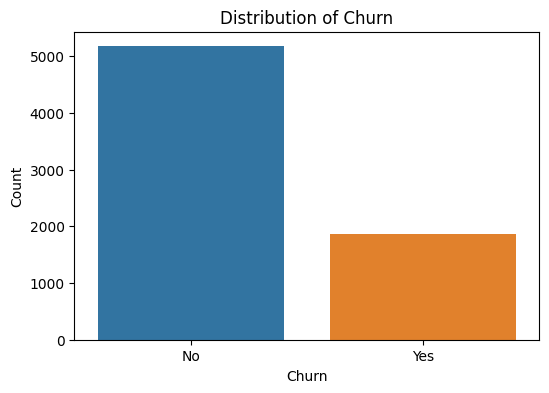

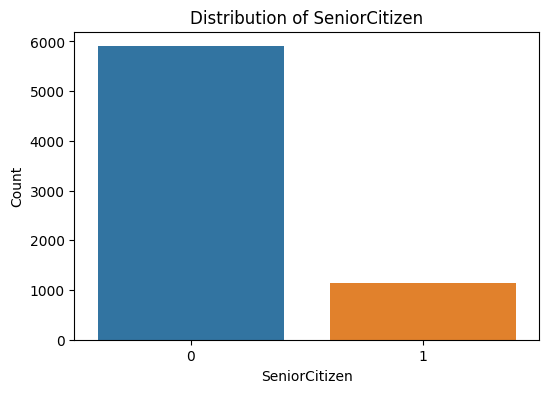

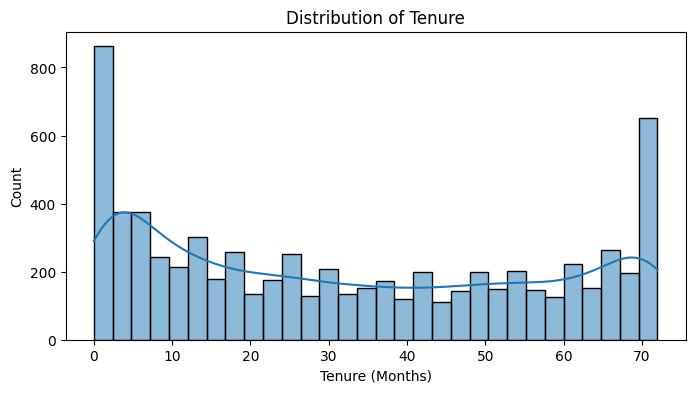

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Add more plots for other variables of interest

# Example 1: Distribution of 'SeniorCitizen'
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

# Example 2: Distribution of 'tenure'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

# Add more plots for other variables of interest in a similar fashion


In [11]:
# Example of One-Hot Encoding
df_encoded = pd.get_dummies(df)
import pandas as pd
from sklearn.model_selection import train_test_split
print(df_encoded.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.85', 'TotalCharges_996.95', 'TotalCharges_997.65',
       'TotalCharges_997.75', 'TotalCharges_998.1', 'TotalCharges_999.45',
       'TotalCharges_999.8', 'TotalCharges_999.9', 'Churn_No', 'Churn_Yes'],
      dtype='object', length=13620)


In [12]:
# Splitting data into train and test sets
X = df_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1)  # Drop the binary label columns
y = df_encoded['Churn_Yes']  # Use 'Churn_Yes' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
